# Regresión logística: 

## Conocemos un poco nuestro dataset a través de gráficas: 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# cargamos el fichero de entrenamiento
entrenamiento = pd.read_csv('./datasets/titanic/test-original.csv')

In [3]:
entrenamiento.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


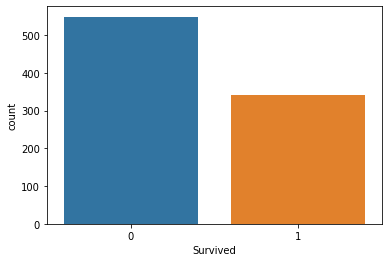

In [4]:
# Vamos a conocer los que han sobrevivido frente a los que no han sobrevivido
sns.countplot(x='Survived', data=entrenamiento)

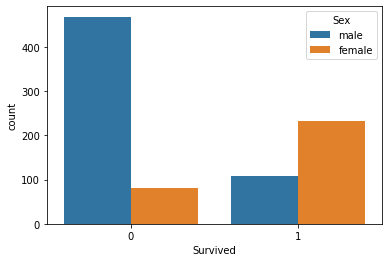

In [5]:
# Vamos a conocer los que han sobrevivido frente a los que no han sobrevivido POR SEXOS ('hue' es el parámetro extra)
sns.countplot(x='Survived', data=entrenamiento, hue='Sex')

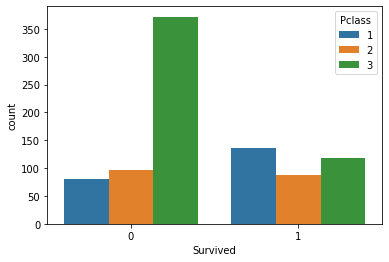

In [6]:
# Vamos a conocer los que han sobrevivido frente a los que no han sobrevivido por categoría (clase 1 la mejor y clase 3 la peor) de embarco
sns.countplot(x='Survived', data=entrenamiento, hue='Pclass')

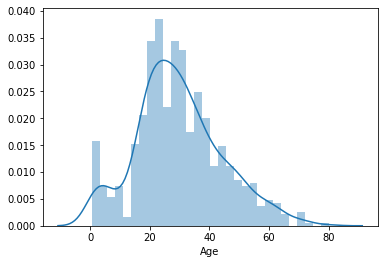

In [7]:
# vamos a visualizar la distribución por edades.
# con '.dropna()' pedimos que borre los nulos
# si ponemos kde=False, no se representaría la parte curva
sns.distplot(entrenamiento['Age'].dropna(), bins=30)

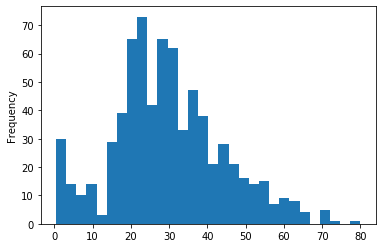

In [8]:
# Podemos hacer lo mismo con la librería plot.hist (histograma) a través de un dataframe (bins=numero de columnas)
entrenamiento['Age'].plot.hist(bins=30)

In [9]:
# Si queremos crear un gráfico interactivo con cufflinks
import cufflinks as cf
# lo hacemos offline
cf.go_offline()
entrenamiento['Age'].iplot(kind='hist', bins=30)

## Vamos a hacer una limpieza de nuestro dataset:

Los pasos a seguir van a ser:
1. Eliminar los valores nulos, bien calculando la media e insertandola en donde no haya valores (columna 'Age')
2. Eliminando directamente la columna, si hay exceso de valores nulos (columna 'Cabin')
3. Las columnas que tienen labels en forma de string, transformarlos a valores lógicos (0 o 1)

### Eliminación de los valores nulos

In [10]:
# mostramos los 5 primeros valores
entrenamiento.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


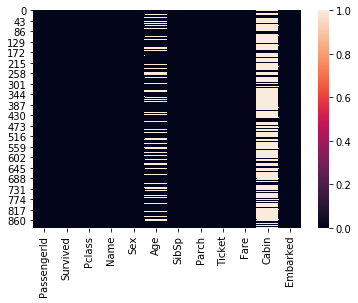

In [11]:
# creamos un gráfico que nos permite observar que columnas tienen más valores nulos, en este caso Age y Cabin
sns.heatmap(entrenamiento.isnull())

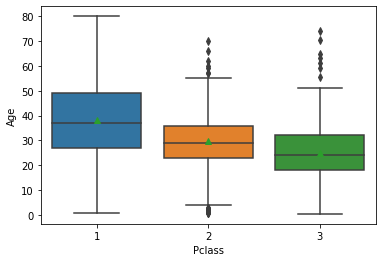

In [12]:
"""
 Vamos a cambiar este valor nulo por el valor medio de cada columna
 Vamos a obtener el valor medio con un diagrama de cajas
 La caja representa el 50% de los valores y la linea representa el valor medio
 Según el diagrama las medias aproximadas que nos encontramos serían:
     Pclass 1: ~ 38
     Pclass 2: ~ 30
     Pclass 3: ~ 25
"""    
sns.boxplot(x='Pclass', y='Age', data=entrenamiento, showmeans=True)

In [13]:
# Obtenemos los valores medios exactos
medians = entrenamiento.groupby(['Pclass'])['Age'].median()
medians

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [14]:
# Creamos una función devuelve los valores medios de edad según la clase
def getMedianAge(columns):
    age = columns[0]    # primera columna
    pclass = columns[1] # segunda columna
    if pd.isnull(age): # comprueba si el elemento de age es nulo
        if pclass is 1: 
            return medians[0]
        elif pclass is 2:
            return medians[1]
        else:
            return medians[2]
    else:
        return age


In [15]:
# visualizamos las columnas
entrenamiento.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [16]:
# Seleccionamos nuestras 2 columnas
columns = entrenamiento[['Age','Pclass']]
columns

,Age,Pclass
0,22.0,3
1,38.0,1
2,26.0,3
3,35.0,1
4,35.0,3
...,...,...
886,27.0,2
887,19.0,1
888,NaN,3
889,26.0,1


In [17]:
# aplica sobre las 2 columnas la función 'getMedianAge'.
# el parámetro axis=1 sirve para indicarle que lo aplique sobre las columnas
entrenamiento['Age'] = columns.apply(getMedianAge, axis=1)

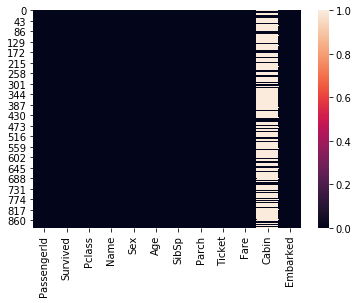

In [18]:
# comprobamos que se han rellenado los valores de Age
sns.heatmap(entrenamiento.isnull())

In [19]:
# Eliminamos la columna Cabin
# con axis=1 le estamos diciendo que se trata de una columna
# con inplace=True decimos que aplique el cambio definitivamente sobre el dataframe
entrenamiento.drop('Cabin', axis=1, inplace=True)

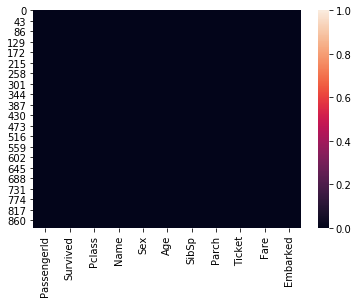

In [20]:
# Comprobamos que se ha hecho una limpieza de los valores nulos
sns.heatmap(entrenamiento.isnull())

### Dejamos solo variables numéricas y eliminamos las alfanuméricas:

In [21]:
entrenamiento.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [22]:
# Eliminamos algunas columnas que no son necesarias: 
entrenamiento.drop(['Name','PassengerId','Ticket'], axis=1, inplace=True)

In [23]:
entrenamiento.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [24]:
# necesitamos convertir a binario las columnas 'Sex' y 'Embarked'
# Creamos 2 columnas (0 si no viene, 1 si viene)
pd.get_dummies(entrenamiento['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [25]:
# vamos a decirle que borre la primera columna
# si es 1 es un hombre, si es un 0 es una mujer
sex = pd.get_dummies(entrenamiento['Sex'], drop_first=True)
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [26]:
# añadimos la nueva columna concatenando dataframes con la función concat
entrenamiento = pd.concat([entrenamiento, sex], axis=1)

In [28]:
# borramos la antigua columna
entrenamiento.drop('Sex', axis=1, inplace=True)

In [31]:
entrenamiento.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male
0,0,3,22.0,1,0,7.2500,S,1
1,1,1,38.0,1,0,71.2833,C,0
2,1,3,26.0,0,0,7.9250,S,0
3,1,1,35.0,1,0,53.1000,S,0
4,0,3,35.0,0,0,8.0500,S,1


In [33]:
# Falta hacer lo mismo con la columna 'Embarked' (puerto de embarque)
puerto = pd.get_dummies(entrenamiento['Embarked'])
puerto

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [34]:
# Vamos a convertir las 3 columnas numéricas obtenidas en 2.
# C Q S :son las iniciales de las ciudades de las que desenbarcó
# si eliminamos la primera columna (C) podemos deducir que cuando Q y S sean 0, habrá desembarcado de C
puerto = pd.get_dummies(entrenamiento['Embarked'], drop_first=True)
puerto

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [35]:
# añadimos la nueva columna concatenando dataframes con la función concat
entrenamiento = pd.concat([entrenamiento, puerto], axis=1)
# eliminamos la columna alfanumérica antigua:
entrenamiento.drop('Embarked', axis=1, inplace=True)
# visualizamos el resultado
entrenamiento

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,29.0,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


### Aplicamos machine learning (regresion logística). Realización de predicciones:

In [37]:
# Obtenemos las características y el valor objetivo:
# A partir del resto de características vamos a predecir si sobrevive o no

X = entrenamiento.drop('Survived', axis=1) # características (borramos la columna Survived)
y = entrenamiento['Survived'] # valores objetivo



In [38]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [39]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [42]:
from sklearn.model_selection import train_test_split

# dividimos según test_size el porcentaje de datos que aplicaremos para testear nuestro entrenamiento
# random_state: semilla para que coja de forma aleatoria los valores de la tabla
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=45)

In [43]:
# 80% de valores (características) cogidos aleatoriamente para entrenar
X_train

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
332,1,38.0,0,1,153.4625,1,0,1
281,3,28.0,0,0,7.8542,1,0,1
147,3,9.0,2,2,34.3750,0,0,1
11,1,58.0,0,0,26.5500,0,0,1
405,2,34.0,1,0,21.0000,1,0,1
...,...,...,...,...,...,...,...,...
725,3,20.0,0,0,8.6625,1,0,1
607,1,27.0,0,0,30.5000,1,0,1
544,1,50.0,1,0,106.4250,1,0,0
643,3,29.0,0,0,56.4958,1,0,1


In [45]:
# creamos el modelo
from sklearn.linear_model import LogisticRegression
modelo = LogisticRegression()

In [46]:
# entrenamos el modelo con los datos de entrenamiento
modelo.fit(X_train,y_train) # características de entrenamiento y su resultado

/home/ikari/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
y_predicciones = modelo.predict(X_test)
y_predicciones

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0])

In [54]:
# comparamos los valores de test con los obtenidos en las predicciones
dicc = {'Survived_test': y_test, 'Survived_predict': y_predicciones}
df_comparative = pd.DataFrame(dicc)
df_comparative.head(10)

,Survived_test,Survived_predict
248,1,0
197,0,0
133,1,1
169,0,0
736,0,0
166,1,1
250,0,0
719,0,0
603,0,0
471,0,0


In [57]:
# Obtenemos los datos resultantes de la predicción para ver su precisión a través de las métricas
from sklearn.metrics import classification_report

# con esto podemos saber que tenemos un 87% de precisión para los no supervivientes y un 76% para los supervivientes
print(classification_report(y_test, y_predicciones))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       117
           1       0.76      0.76      0.76        62

    accuracy                           0.83       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.83      0.83      0.83       179



In [58]:
# matriz de confusión para ver los falsos positivos o falsos negativos
from sklearn.metrics import confusion_matrix
# nos indica los falsos positivos y negativos (15 y 15)

""" ---- Matriz de confusión ----
positivos_correctos, negativos_incorrectos
positivos_incorrectos, negativos_correctos
"""
confusion_matrix(y_test, y_predicciones)

array([[102,  15],
       [ 15,  47]])